<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn16_DifferentialEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenvector / Eigenvalue Analysis of System of Differential Equations
In this section, we use the techniques from class in order to classify the equilibrium points with the eigenvalues of the linear approximation (Jacobian matrix) at the equilibrium point. In class on Monday, we will cover the continuous time version of what we did on Lesson 15 for discrete systems. The theory that we cover is linear, 1st order systems of equations that we can use to solve nonlinear equations by using linear approximations near the equilibrium points (see the nonlinear problem below).

In [0]:
options(warn=-1)
library(pracma)
library(ma391laporte) #Note: I have changed some of the functions in the library to capital letters so that they do not 
                      # step on functions in other libraries (see VectorField below)

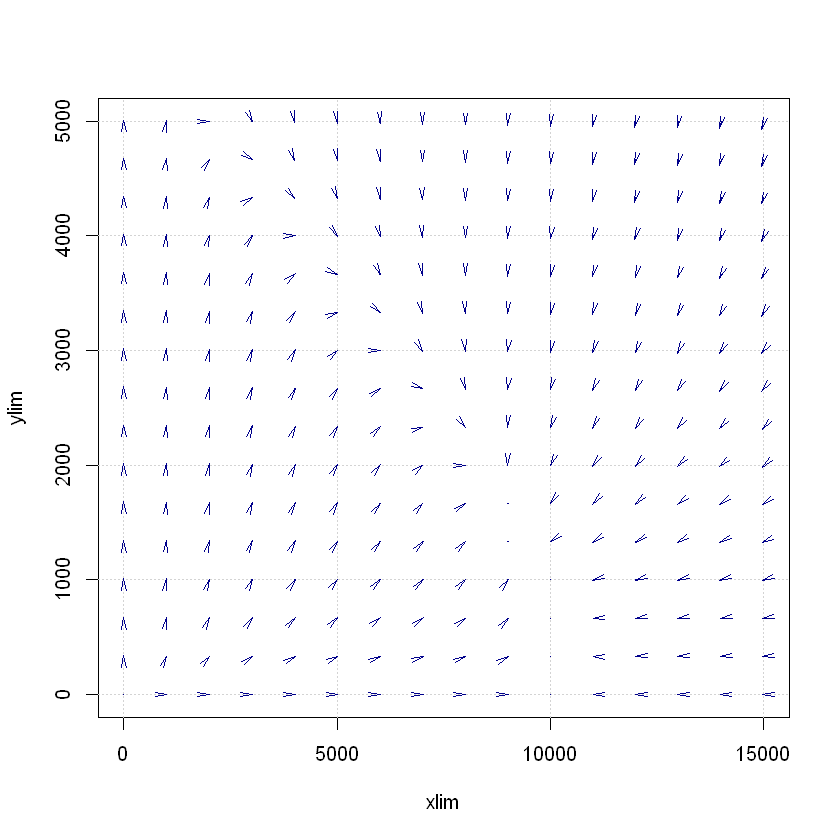

In [0]:
t=0.5
f = function(x){c(0.10*x[1]*(1-x[1]/10000)-t*0.1/10000*x[1]*x[2],
                 0.25*x[2]*(1-x[2]/6000)-t*0.25/6000*x[1]*x[2])}
VectorField(f,xlim = c(0,15000),ylim = c(0,5000))

In [0]:
## The Zeros function uses Newtons's method to find the equilibrium points - you will have to adjust x0.
x0=c(12000,500) 
x0=Zeros(f,x0)
print(x0)

[1] 9333.333 1333.333


In [0]:
## Is this a stable equilibrium point
A = Jacobian2(f,x0) # The Jacobian gives a linear approximation near x0
ev=eigen(A)
print(ev)

eigen() decomposition
$values
[1] -0.11510261 -0.03378628

$vectors
           [,1]       [,2]
[1,] -0.9062464  0.6168379
[2,] -0.4227499 -0.7870902



     t    lambda1       lambda2
1  0.0 -0.1000000 -2.500000e-01
2  0.1 -0.2121427 -9.324454e-02
3  0.2 -0.1807564 -8.452135e-02
4  0.3 -0.1546288 -7.284370e-02
5  0.4 -0.1329881 -5.669440e-02
6  0.5 -0.1151026 -3.378628e-02
7  0.6 -0.1000000 -2.936853e-09
8  0.7 -0.1000000 -4.166667e-02
9  0.8 -0.1000000 -8.333333e-02
10 0.9 -0.1250000 -1.000000e-01


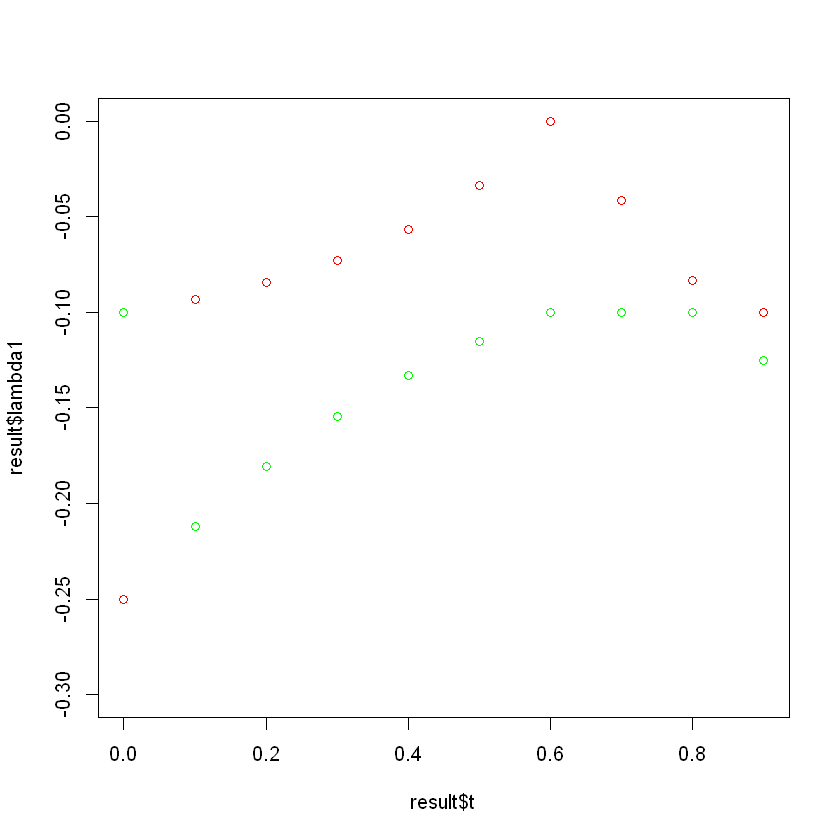

In [0]:
## Sensitivity of Solution (this is a stable equilibrium)
t = seq(0,0.9,0.1)
ans.lambda1 = 0
ans.lambda2 = 0
for (i in 1:length(t)){
  f = function(x){c(0.10*x[1]*(1-x[1]/10000)-0.1*t[i]/10000*x[1]*x[2],
                    0.25*x[2]*(1-x[2]/6000)-0.25*t[i]/6000*x[1]*x[2])}
  x0 = Zeros(f,c(10000,6000))
  A = Jacobian2(f,x0)
  ev=eigen(A)
  ans.lambda1[i]=ev$values[1]
  ans.lambda2[i]=ev$values[2]
}
result = data.frame(t=t,lambda1=ans.lambda1,lambda2=ans.lambda2)
print(result)

## Plot Figure 5.3 in the book
plot(result$t,result$lambda1,ylim=c(-0.3,0),col="green")
points(result$t,result$lambda2,col="red")

## Chapter 5: Number 1

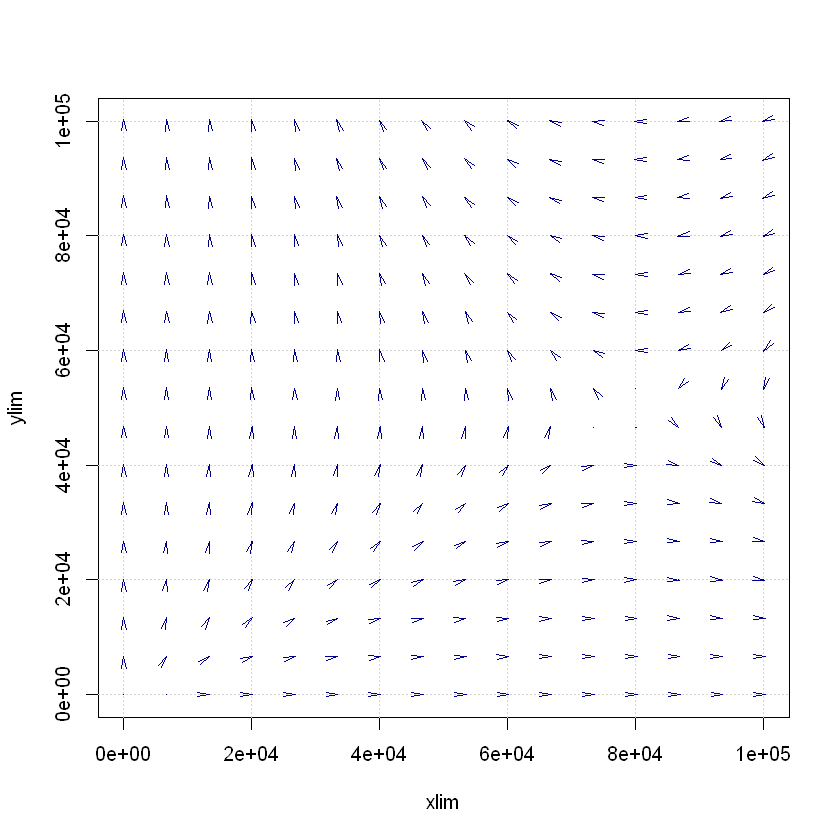

In [0]:
alpha = 0.000001
f = function(x){c(.05*x[1]-alpha*x[1]*x[2],
                 .08*x[2]-alpha*x[1]*x[2])}

VectorField(f,xlim=c(0,100000),ylim=c(0,100000))

In [0]:
x0=c(40000,30000)
x0=Zeros(f,x0)
print(x0)

[1] 80000 50000


In [0]:
## Equilibrium Point (80000,50000)
A = Jacobian2(f,x0)
ev=eigen(A)
print(ev)
## Eigenvalues are not all <0, so unstable.

eigen() decomposition
$values
[1] -0.06324555  0.06324555

$vectors
          [,1]       [,2]
[1,] 0.7844645  0.7844645
[2,] 0.6201737 -0.6201737



In [0]:
## Equilibrium Point (0,0)
x0 = c(0,0)
A = Jacobian2(f,x0)
ev=eigen(A)
print(ev)
## Eigen values are not all <0, so (0,0) is unstable

eigen() decomposition
$values
[1] 0.08 0.05

$vectors
     [,1] [,2]
[1,]    0   -1
[2,]    1    0



## Chapter 4: Number 7

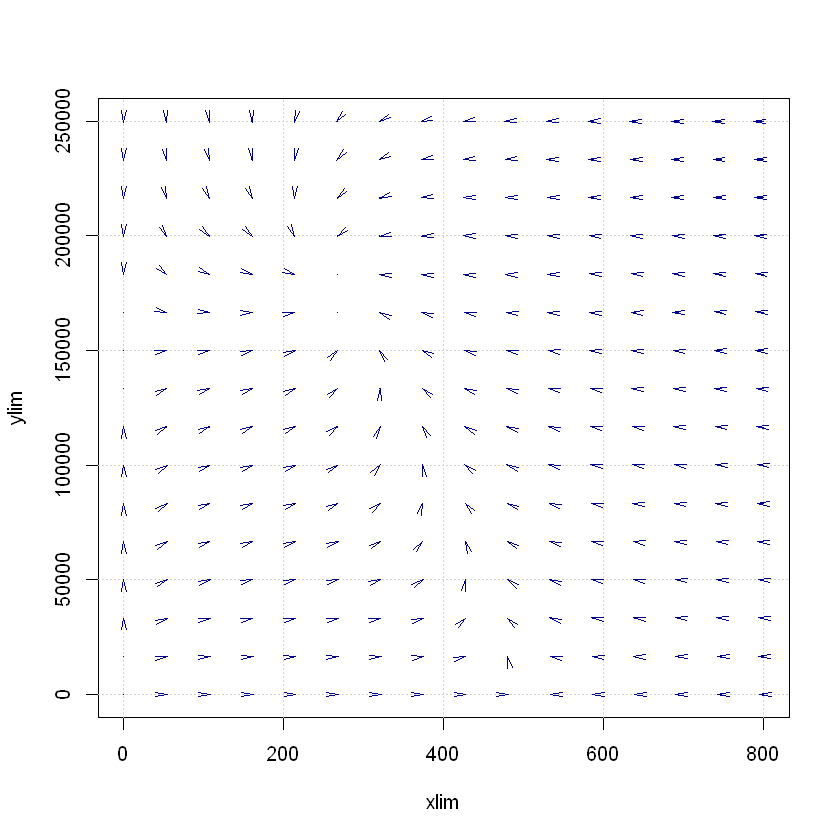

In [0]:
f = function(x){c(0.25*x[1]*(1-x[1]/500)-0.1/150000*x[1]*x[2],
                 0.05*x[2]*(1-x[2]/150000)+0.02/500*x[1]*x[2])}
VectorField(f,xlim=c(0,800),ylim=c(0,250000))

In [0]:
x0=c(400,100000)
x0=Zeros(f,x0)
print(x0)

[1]    258.6207 181034.4828


In [0]:
## Equilibrium Point (80000,50000)
A = Jacobian2(f,x0)
ev=eigen(A)
print(ev)
## Real part of eigenvectors are less than 0. Equilibrium is stable.

eigen() decomposition
$values
[1] -0.09482758+0.00771057i -0.09482758-0.00771057i

$vectors
                          [,1]                      [,2]
[1,] -0.004761848+0.001064781i -0.004761848-0.001064781i
[2,]  0.999988095+0.000000000i  0.999988095+0.000000000i

